In [3]:
## imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.993142,38.922224,20160886,2020/11/10 16:08:26+00,DAY,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF RHODE ISLAND AVENUE NE,400594.86,139371.55,...,009102 4,9102.0,Precinct 72,38.922217,-76.993140,NaN,2020/11/10 13:30:50+00,2020/11/10 13:35:52+00,215280594,NaN
1,-77.031803,38.936024,20160903,2020/11/10 19:29:53+00,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF PERRY PLACE NW,397242.84,140903.83,...,002900 2,2900.0,Precinct 41,38.936016,-77.031801,NaN,2020/11/10 16:18:02+00,2020/11/10 17:04:34+00,215280595,NaN
2,-76.960099,38.929158,20160907,2020/11/10 16:53:22+00,DAY,OTHERS,THEFT/OTHER,2855 - 3200 BLOCK OF BLADENSBURG ROAD NE,403459.94,140142.00,...,011100 1,11100.0,Precinct 71,38.929150,-76.960097,NaN,2020/11/10 16:08:29+00,NaN,215280596,NaN
3,-76.982462,38.899984,20160918,2020/11/10 18:23:56+00,DAY,OTHERS,THEFT F/AUTO,1500 - 1599 BLOCK OF BENNING ROAD NE,401521.47,136902.83,...,007901 4,7901.0,Precinct 81,38.899976,-76.982460,NaN,2020/11/10 01:00:14+00,2020/11/10 11:00:23+00,215280597,NaN
4,-77.008260,38.832486,20160935,2020/11/10 18:57:34+00,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,3846 - 3999 BLOCK OF SOUTH CAPITOL STREET,399283.03,129409.95,...,009807 1,9807.0,Precinct 124,38.832479,-77.008258,NaN,2020/11/10 16:33:17+00,NaN,215280598,NaN


(27912, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27912 entries, 0 to 27911
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27912 non-null  float64
 1   Y                     27912 non-null  float64
 2   CCN                   27912 non-null  int64  
 3   REPORT_DAT            27912 non-null  object 
 4   SHIFT                 27912 non-null  object 
 5   METHOD                27912 non-null  object 
 6   OFFENSE               27912 non-null  object 
 7   BLOCK                 27912 non-null  object 
 8   XBLOCK                27912 non-null  float64
 9   YBLOCK                27912 non-null  float64
 10  WARD                  27912 non-null  int64  
 11  ANC                   27912 non-null  object 
 12  DISTRICT              27883 non-null  float64
 13  PSA                   27877 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27912 non-null  object 
 15  BLOCK_GROUP        

# Example of creating a table to export to latex

In [9]:
method_v_offense = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE)
method_v_offense

## method 1- transpose and print a table to console to copy/paste
print(method_v_offense.T.to_latex(index = True, caption = "Types of weapons in offenses",
                                 label = "tab:method_offense"))

## method 2- write .tex to folder and upload to overleaf/reference the tex file directly 
method_v_offense.T.to_latex("methodoffense.tex", 
                            index = True, caption = "Types of weapons in offenses",
                            label = "tab:method_offense_written")


## for method 2, if working with latex locally, can also then
## just reference the filepath directly rather than uploading to overleaf

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
METHOD,,,,,,,,,
GUN,0,846,15,168,3,982,8,3,7
KNIFE,0,476,2,9,3,122,10,2,17
OTHERS,13,308,1425,19,3251,893,160,8270,10900


\begin{table}
\centering
\caption{Types of weapons in offenses}
\label{tab:method_offense}
\begin{tabular}{lrrr}
\toprule
METHOD &  GUN &  KNIFE &  OTHERS \\
OFFENSE                    &      &        &         \\
\midrule
ARSON                      &    0 &      0 &      13 \\
ASSAULT W/DANGEROUS WEAPON &  846 &    476 &     308 \\
BURGLARY                   &   15 &      2 &    1425 \\
HOMICIDE                   &  168 &      9 &      19 \\
MOTOR VEHICLE THEFT        &    3 &      3 &    3251 \\
ROBBERY                    &  982 &    122 &     893 \\
SEX ABUSE                  &    8 &     10 &     160 \\
THEFT F/AUTO               &    3 &      2 &    8270 \\
THEFT/OTHER                &    7 &     17 &   10900 \\
\bottomrule
\end{tabular}
\end{table}



## Example of creating a figure to export 


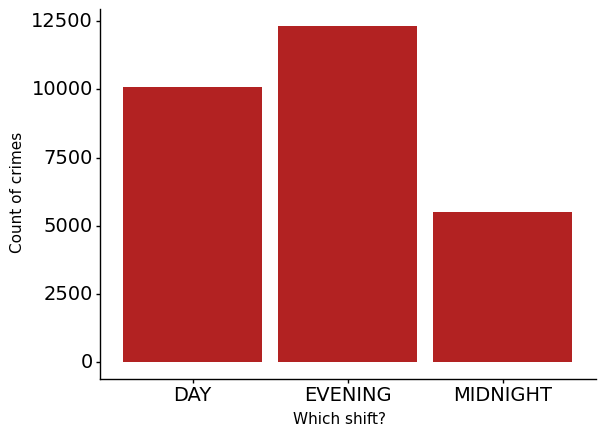

<ggplot: (8770666595325)>

In [8]:
## create a fig with the count of crimes by shift 

count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['CCN'].nunique()).reset_index()

plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
                                       y = 'CCN')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts

## method 1- (would avoid)- can left click and save image

## method 2 - write image
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)

# Activity 

1. The previous table you exported shows the COUNT of methods used by type of offense. Export a new Table to your LaTeX doc that contains the PROPORTION that each method represents for each offense (eg 80+% of homicides are with a gun as the method). Hint: you can use the normalize parameter within the pd.crosstab command for this: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html. Make sure the proportions for each offense type (eg homicides) sums to 1

2. Create the same shift versus count of crimes plot but just for Ward 2 (the ward where Georgetown is located). Save it as plot_shifts_ward2.png and import into your LaTeX memo/summarize with a caption

3. **Challenge exercise**: an analyst on a different team wants a breakdown of how the workload varies by shift. They want a separate figure showing the count of crimes on the y axis and shift on the x axis for each of the wards. Using a user-defined function that creates a plot for ONE WARD, write a separate bar plot for each WARD and make sure to programatically change the name of the plot filename so you know which is which. 

METHOD,GUN,KNIFE,OTHERS
OFFENSE,,,
ARSON,0.000000,0.000000,1.000000
ASSAULT W/DANGEROUS WEAPON,0.519018,0.292025,0.188957
BURGLARY,0.010402,0.001387,0.988211
HOMICIDE,0.857143,0.045918,0.096939
MOTOR VEHICLE THEFT,0.000921,0.000921,0.998158
ROBBERY,0.491738,0.061092,0.447171
SEX ABUSE,0.044944,0.056180,0.898876
THEFT F/AUTO,0.000363,0.000242,0.999396
THEFT/OTHER,0.000641,0.001556,0.997803


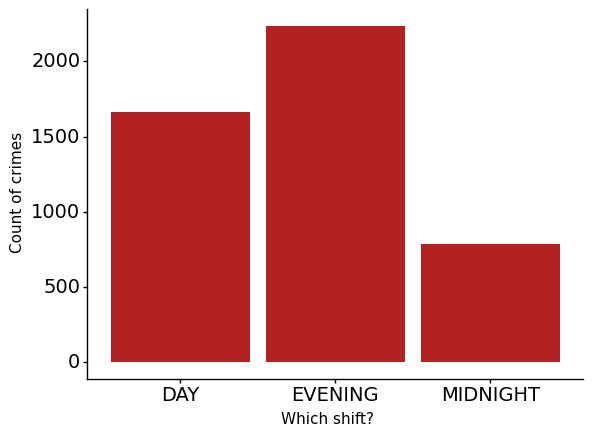

<ggplot: (8770666802707)>

In [19]:
## 1. Repeat with normalize = True

method_v_offense = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE,
                              normalize = 'columns').T
method_v_offense

method_v_offense.T.to_latex("methodoffense_prop.tex", 
                            index = True, caption = "Types of weapons in offenses (proportions)",
                            label = "tab:method_prop")

## 2. ward 2 plot
count_byshift = pd.DataFrame(dc_crim_2020.groupby(['SHIFT', 'WARD'])['CCN'].nunique()).reset_index()
plot_shifts = (ggplot(count_byshift[count_byshift.WARD == 2], aes(x = 'SHIFT', 
                                       y = 'CCN')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts

## method 1- (would avoid)- can left click and save image

## method 2 - write image
plot_shifts.save("plot_shifts_ward2.png", 
                width = 12,
                height = 8,
                verbose = False)

METHOD,OFFENSE,GUN,KNIFE,OTHERS,other_perc
0,ARSON,0,0,13,1.000000
1,ASSAULT W/DANGEROUS WEAPON,842,481,300,0.184843
2,BURGLARY,6,0,1439,0.995848
3,HOMICIDE,170,9,18,0.091371
4,MOTOR VEHICLE THEFT,3,0,3255,0.999079
5,ROBBERY,982,123,890,0.446115
6,SEX ABUSE,8,10,155,0.895954
7,THEFT F/AUTO,0,0,8267,1.000000
8,THEFT/OTHER,1,0,10902,0.999908


['ARSON',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'SEX ABUSE',
 'THEFT F/AUTO',
 'THEFT/OTHER']

'ARSON; BURGLARY; MOTOR VEHICLE THEFT; SEX ABUSE; THEFT F/AUTO; THEFT/OTHER'

'Types of weapons in offenses. This excludes the following offenses where >=80\\% of weapons were other: ARSON; BURGLARY; MOTOR VEHICLE THEFT; SEX ABUSE; THEFT F/AUTO; THEFT/OTHER'

\begin{table}
\centering
\caption{Types of weapons in offenses. This excludes the following offenses where >=80\% of weapons were other: ARSON; BURGLARY; MOTOR VEHICLE THEFT; SEX ABUSE; THEFT F/AUTO; THEFT/OTHER}
\label{tab:method_offense_filtered}
\begin{tabular}{lrrrr}
\toprule
                   OFFENSE &  GUN &  KNIFE &  OTHERS &  other\_perc \\
\midrule
ASSAULT W/DANGEROUS WEAPON &  842 &    481 &     300 &    0.184843 \\
                  HOMICIDE &  170 &      9 &      18 &    0.091371 \\
                   ROBBERY &  982 &    123 &     890 &    0.446115 \\
\bottomrule
\end{tabular}
\end{table}



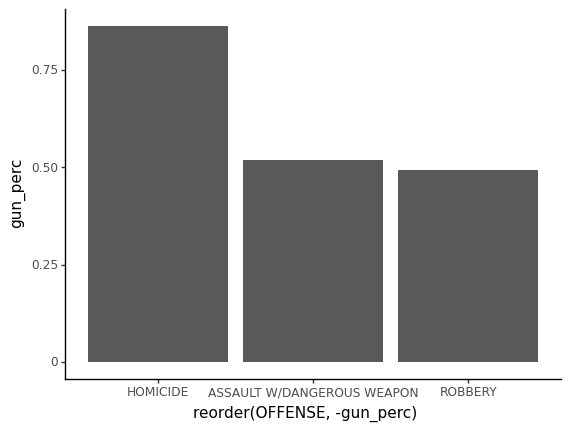

<ggplot: (8784119755716)>

ANC,1A,1B,1C,1D,2A,2B,2C,2D,2E,2F,...,7B,7C,7D,7E,7F,8A,8B,8C,8D,8E
is_ward_8,,,,,,,,,,,,,,,,,,,,,
False,1134,1514,560,327,431,1243,843,57,785,999,...,728,794,896,645,647,0,0,0,0,0
True,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,806,472,501,429,530


['8C', '8A', '8D', '8E', '8B']

[None, None, None, None, None]

In [13]:
## automate - put solution later